In [ ]:
 import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

In [ ]:
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from PIL import Image, ImageChops, ImageEnhance
from tqdm.notebook import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd Dataset

[Errno 2] No such file or directory: 'Dataset'
/content


In [ ]:
ls

drive/  sample_data/


In [ ]:
os.getcwd()

'/content'

In [ ]:
#.
def convert_to_ela_image(path,quality):

    original_image = Image.open(path).convert('RGB')

    resaved_file_name = 'resaved_image.jpg'
    original_image.save(resaved_file_name,'JPEG',quality=quality)
    resaved_image = Image.open(resaved_file_name)

    ela_image = ImageChops.difference(original_image,resaved_image)

    extrema = ela_image.getextrema()
    max_difference = max([pix[1] for pix in extrema])
    if max_difference ==0:
        max_difference = 1
    scale = 255 / max_difference

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

In [ ]:
#.
def prepare_image(image_path):
    image_size = (128, 128)
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

X = []
Y = []

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Dataset/CASIA2/Au/'
i = 0
for filename in tqdm(os.listdir(path), desc="Processing Images : "):
    if i == 2642 :
      break
    if filename.lower().endswith(('jpg', 'jpeg', 'png')):
        i+=1
        try:
            full_path = os.path.join(path, filename)
            # Assuming prepare_image function returns a valid result
            X.append(prepare_image(full_path))
            Y.append(1)
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

print(f'Total images: {len(X)}\nTotal labels: {len(Y)}')


Processing Images :   0%|          | 0/4335 [00:00<?, ?it/s]

Total images: 2642
Total labels: 2642


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Dataset/CASIA2/Tp/'
i=0
for filename in tqdm(os.listdir(path),desc="Processing Images : "):
        if i == 2642 :
          break
        if filename.endswith('jpg') or filename.endswith('tif') or filename.endswith('jpeg'):
            i+=1
            try:
                full_path = os.path.join(path, filename)
                X.append(prepare_image(full_path))
                Y.append(0)
            except:
                pass


print(f'Total images: {len(X)}\nTotal labels: {len(Y)}')

Processing Images :   0%|          | 0/3313 [00:00<?, ?it/s]

Total images: 5284
Total labels: 5284


In [ ]:
from sklearn.utils import shuffle

In [ ]:
X = np.array(X)
Y = np.array(Y)
X,Y= shuffle(X,Y)

X = X.reshape(-1, 128, 128, 3)



np.save('/content/drive/MyDrive/Colab Notebooks/proposed_fidac_500_x.npy', X, allow_pickle=True)
np.save('/content/drive/MyDrive/Colab Notebooks/proposed_fidac_500_y.npy', Y, allow_pickle=True)

In [ ]:
#.
X = np.load('/content/drive/MyDrive/Colab Notebooks/proposed_fidac_500_x.npy', allow_pickle=True)
Y = np.load('/content/drive/MyDrive/Colab Notebooks/proposed_fidac_500_y.npy', allow_pickle=True)

print(np.shape(X),np.shape(Y))

(5284, 128, 128, 3) (5284,)


In [ ]:
#.
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.05, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)

print(f'Training images: {len(X_train)} , Training labels: {len(Y_train)}')
print(f'Validation images: {len(X_val)} , Validation labels: {len(Y_val)}')
print(f'Test images: {len(X_test)} , Test labels: {len(Y_test)}')

Training images: 4015 , Training labels: 4015
Validation images: 1004 , Validation labels: 1004
Test images: 265 , Test labels: 265


In [ ]:

print(Y_test)

[1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 0 0]


In [ ]:

train_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    #zca_whitening=False,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)
test_gen =  ImageDataGenerator()

train_gen.fit(X_train)
test_gen.fit(X_val)

augmented_data = []

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(256, (3,3), activation = 'relu'))
    model.add(Conv2D(256, (3,3), activation = 'relu', padding = "SAME"))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1

In [ ]:
epochs = 50
batch_size = 19

In [ ]:
init_lr = 1e-4
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = init_lr, decay = init_lr/epochs)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0,
                               patience = 10,
                               verbose = 0,
                               mode = 'auto')

In [ ]:
hist = model.fit(train_gen.flow(X_train, Y_train, batch_size=19),
                 batch_size = batch_size,
                 epochs = epochs,
                 #steps_per_epoch = 14,
                 validation_data = train_gen.flow(X_train, Y_train, batch_size=19))
                 #callbacks = [early_stopping])

Epoch 1/50
212/212 [==============================] - 48s 171ms/step - loss: 0.4828 - accuracy: 0.7544 - val_loss: 0.3450 - val_accuracy: 0.8590
Epoch 2/50
212/212 [==============================] - 39s 184ms/step - loss: 0.3462 - accuracy: 0.8770 - val_loss: 0.3018 - val_accuracy: 0.8917
Epoch 3/50
212/212 [==============================] - 39s 186ms/step - loss: 0.3379 - accuracy: 0.8832 - val_loss: 0.2901 - val_accuracy: 0.9006
Epoch 4/50
212/212 [==============================] - 39s 185ms/step - loss: 0.3154 - accuracy: 0.8879 - val_loss: 0.2918 - val_accuracy: 0.8989
Epoch 5/50
212/212 [==============================] - 37s 173ms/step - loss: 0.3253 - accuracy: 0.8844 - val_loss: 0.2815 - val_accuracy: 0.9041
Epoch 6/50
212/212 [==============================] - 36s 171ms/step - loss: 0.3133 - accuracy: 0.8904 - val_loss: 0.2981 - val_accuracy: 0.8867
Epoch 7/50
212/212 [==============================] - 41s 194ms/step - loss: 0.3178 - accuracy: 0.8879 - val_loss: 0.2981 - val_ac

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/ela_casia.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history_dict = hist.history
json.dump(history_dict, open('model_history', 'w'))

In [ ]:
#.
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/ela_casia.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history_dict['loss'], color='b', label = "Training loss")
ax[0].plot(history_dict['val_loss'], color='r', label = "Validation loss",axes =ax[0])
ax[0].set_xlabel('Epochs',fontsize=16)
ax[0].set_ylabel('Loss',fontsize=16)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_dict['accuracy'], color='b', label = "Training accuracy")
ax[1].plot(history_dict['val_accuracy'], color='r',label = "Validation accuracy")
ax[1].set_xlabel('Epochs',fontsize=16)
ax[1].set_ylabel('Accuracy',fontsize=16)
legend = ax[1].legend(loc='best', shadow=True)

fig.suptitle('Metrics',fontsize=20);

In [ ]:
def plot_confusion_matrix(cf_matrix):

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    axes_labels=['Forged', 'Authentic']
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='',cmap="flare" , xticklabels=axes_labels, yticklabels=axes_labels)

    plot_xlabel = plt.xlabel('Predicted labels', fontsize = 13)
    plot_ylabel = plt.ylabel('True labels', fontsize = 13)
    plot_title = plt.title('Confusion Matrix', fontsize= 10,fontweight='bold')

32/32 [==============================] - 1s 14ms/step


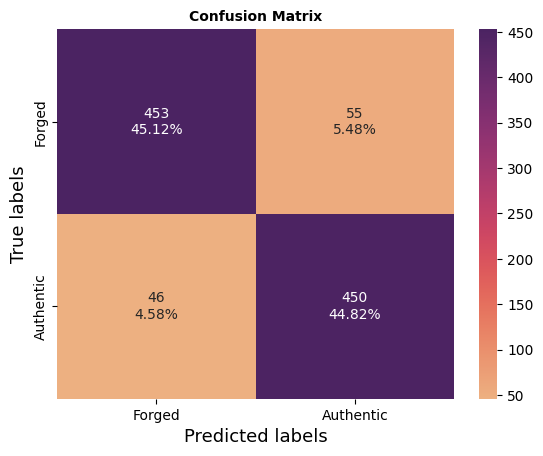

In [ ]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.round(Y_pred)
Y_true = Y_val

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx)

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       508
           1       0.89      0.91      0.90       496

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004



In [ ]:
class_names = ['Forged', 'Authentic']

In [ ]:
correct_test = 0
total_test = 0

for index,image in enumerate(tqdm(X_test,desc="Processing Images : ")):
    image = image.reshape(-1, 128, 128, 3)
    y_pred = model.predict(image)
    y_pred_class = np.round(y_pred)
    total_test += 1
    if y_pred_class == Y_test[index]:
        correct_test += 1

print(f'Total test images: {total_test}\nCorrectly predicted images: {correct_test}\nAccuracy: {correct_test / total_test}')

Processing Images :   0%|          | 0/265 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
Total test images: 265
Correctly predicted images: 257
Accuracy: 0.969811320754717


In [ ]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
fake_image = '/content/drive/My Drive/Colab Notebooks/Dataset/Test/Tp/'
correct = 0
total = 0
for file_name in os.listdir(fake_image):
    if file_name.endswith('jpg') or file_name.endswith('png'):
        test_image_path = os.path.join(fake_image, file_name)
        test_image = prepare_image(test_image_path)
        test_image=test_image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(test_image)
        y_pred_class = round(y_pred[0][0])
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 23.36
1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 3.07
1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 29.24
1/1 [==============================] - 0s 20ms/step
Class: Forged Confidence: 31.81
1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 7.54
1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 0.36
1/1 [==============================] - 0s 21ms/step
Class: Forged Confidence: 23.01
1/1 [==============================] - 0s 30ms/step
Class: Forged Confidence: 3.95
1/1 [==============================] - 0s 42ms/step
Class: Forged Confidence: 1.32
1/1 [==============================] - 0s 40ms/step
Class: Forged Confidence: 3.37
1/1 [==============================] - 0s 20ms/step
Class: Forged Confidence: 47.20
Total: 16, Correct: 11, Acc: 68.75


In [ ]:
real_image = '/content/drive/My Drive/Colab Notebooks/Dataset/Test/Au/'
correct_r = 0
total_r = 0
for file_name in os.listdir(real_image):
    if file_name.endswith('jpg') or file_name.endswith('png'):
        test_image_path = os.path.join(real_image, file_name)
        test_image = prepare_image(test_image_path)
        test_image=test_image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(test_image)
        y_pred_class = round(y_pred[0][0])
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')

1/1 [==============================] - 0s 24ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 24ms/step
Class: Authentic Confidence: 98.84
1/1 [==============================] - 0s 20ms/step
Class: Authentic Confidence: 97.41
1/1 [==============================] - 0s 21ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 20ms/step
Class: Authentic Confidence: 99.99
1/1 [==============================] - 0s 21ms/step
Class: Authentic Confidence: 97.28
1/1 [==============================] - 0s 21ms/step
Class: Authentic Confidence: 97.39
1/1 [==============================] - 0s 33ms/step
Class: Authentic Confidence: 92.94
1/1 [==============================] - 0s 20ms/step
Class: Authentic Confidence: 94.37
1/1 [==============================] - 0s 23ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 21ms/step
Class: Authentic Confidence: 99.87
1/1 [==============================] - 0

In [ ]:
correct += correct_r
total += total_r
#print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 66, Correct: 54, Acc: 81.81818181818183


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Dataset/CASIA2/Au/'
i = 0
for filename in tqdm(os.listdir(path), desc="Processing Images : "):
    if i == 2642 :
      break
    if filename.lower().endswith(('jpg', 'jpeg', 'png')):
        i+=1
        try:
            full_path = os.path.join(path, filename)
            # Assuming prepare_image function returns a valid result
            X.append(prepare_image(full_path))
            Y.append(1)
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

Processing Images :   0%|          | 0/4335 [00:00<?, ?it/s]

Error processing Au_cha_30020.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30022.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30017.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30021.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30034.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30044.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30035.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30042.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30038.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30045.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30029.jpg: 'numpy.ndarray' object has no attribute 'append'
Error processing Au_cha_30040.jpg: 'numpy.ndarray' object has no attribute '

In [ ]:
#.
class_names = ['Forged', 'Authentic']

In [ ]:
#.
import matplotlib.pyplot as plt
import cv2
def display_image(image_path):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

total images:  1


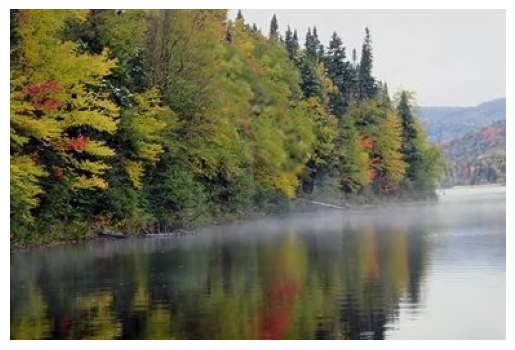

1/1 [==============================] - 2s 2s/step
Class: Forged


In [ ]:
#.
from glob import glob
#images = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/CASIA2/Tp/*.jpg')
# images = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/image.tif')
images = glob('/content/Tp_S_NRN_S_O_nat00032_nat00032_00947.tif')
print('total images: ', len(images))
img1 = images[0]
display_image(img1)
correct_r = 0
total_r = 0
test_image = prepare_image(img1)
test_image=test_image.reshape(-1, 128, 128, 3)
y_pred = model.predict(test_image)
y_pred_class = round(y_pred[0][0])
total_r += 1
if y_pred_class == 1:
    correct_r += 1
    print(f'Class: {class_names[y_pred_class]}')
else :
  print(f'Class: {class_names[y_pred_class]}')
# print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')